<a href="https://colab.research.google.com/github/EduardoMoraesRitter/deep-learning-tensorflow-python/blob/main/7_Classifica%C3%A7%C3%A3o_roupas_RN_Convolucional_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição

sao 70.000 imagens de roupas do tamanho 28x28 em apenas escala de cinza cada pixel na escala de 0(preto) a 255(branco), toral de 784 pixeis ou colunas, nao temos 3 dimencoes como core de RGB. 
as imagens vao classificar em 10 classes.

# Redes Neurais Convolucionais (CNN)

## Kernel - aplicar filtros sao calculos matematicos para efeitos na imagens
## Feature Map - diminuindo as dimençoes da imagem com calculo, um resumo da imagen, iamgem reduzida
## Funcao Relu - adiciona nao linearidade no mapa, aprimorar a dispersao no mapa de caracteristicas
## Pooling - diminui a dimençao do mapa de caracteres, assim processa mais rapido, ajuda a generalizar evitando overfitting
## Flattening - transforma a matriz em um vetor para a rede.

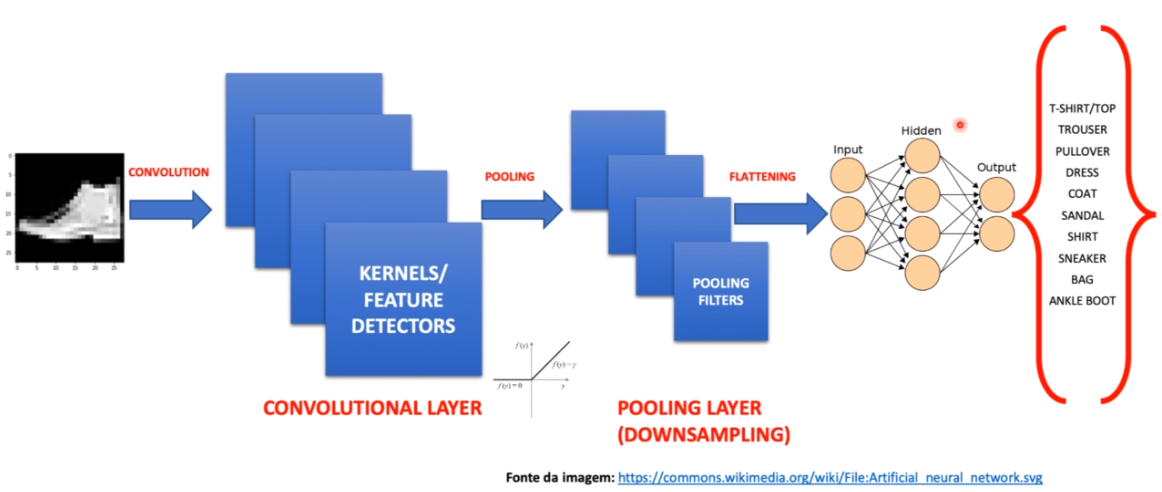


#1 - Impostação

In [1]:
#para nao treinar com menos imagens
!pip install tensorflow==2.1

In [2]:
%tensorflow_version 2.1.0
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
tf.__version__

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.1.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


'2.1.0'

# 2 - dados

In [3]:
#pelo drive
#from google.colab import drive
#drive.mount('/content/drive')

#f_t_df = pd.read_csv('pasta.csv', sep=',')

In [4]:
#ja podemos pegar no keras
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#3 - Visualizar

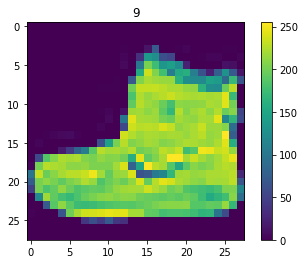

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.title(train_labels[0])
plt.colorbar()
plt.grid(False)
plt.show()

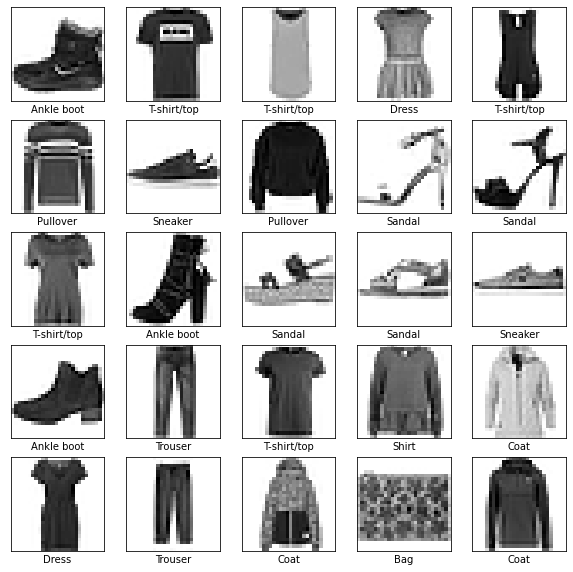

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#4 - Tratamento

In [7]:
#mudar a escala da imagem de 0 a 255 para 0 ate 1
X_train = train_images/255
Y_train = train_labels

X_test= test_images/255
Y_test = test_labels

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


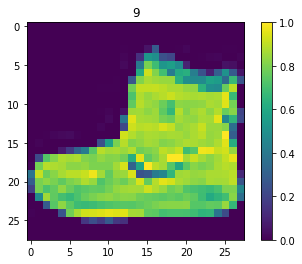

In [8]:
plt.figure()
plt.imshow(X_train[0])
plt.title(Y_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
#precisamos ter o canal = 1 para a convolução
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_test.shape

(10000, 28, 28, 1)

#5 - Modelo

In [11]:
from tensorflow.keras import layers, models

In [12]:
cnn = models.Sequential()

#1°camada 32 detectores(filtros), map fetures do tamanho de 3 por 3, funcao de ativacao, e input
cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))) 
#Maz Pooling reduzir a dimencao
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(64, (3,3), activation='relu')) 
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(64, (3,3), activation='relu')) 
#flattening traformar em vetor
cnn.add(layers.Flatten())

#camada densa
cnn.add(layers.Dense(64, activation='relu'))

#camada de output com 10 classes, 
#softmax para trabalhar com probabilidade para cada classe
#sigmoid é para classificacao com duas classes
cnn.add(layers.Dense(10, activation='softmax'))

#visualizar
cnn.summary()

#formato sparse - uma unica coluna categorica
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [13]:
epochs=15
#batch_size os ajustes de pesos sao feitos a cada 512 imagesn
history = cnn.fit(X_train, Y_train, batch_size=512, epochs=epochs)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 46s 772us/sample - loss: 0.8544 - accuracy: 0.7068
Epoch 2/15
60000/60000 [==============================] - 46s 761us/sample - loss: 0.4825 - accuracy: 0.8247
Epoch 3/15
60000/60000 [==============================] - 46s 765us/sample - loss: 0.4154 - accuracy: 0.8503
Epoch 4/15
60000/60000 [==============================] - 46s 763us/sample - loss: 0.3732 - accuracy: 0.8664
Epoch 5/15
60000/60000 [==============================] - 46s 765us/sample - loss: 0.3436 - accuracy: 0.8781
Epoch 6/15
60000/60000 [==============================] - 46s 764us/sample - loss: 0.3249 - accuracy: 0.8836
Epoch 7/15
60000/60000 [==============================] - 49s 816us/sample - loss: 0.3059 - accuracy: 0.8897
Epoch 8/15
60000/60000 [==============================] - 46s 761us/sample - loss: 0.2931 - accuracy: 0.8941
Epoch 9/15
60000/60000 [==============================] - 46s 762us/sample - loss: 0.2771 - accuracy: 0.8

#6 - Validação

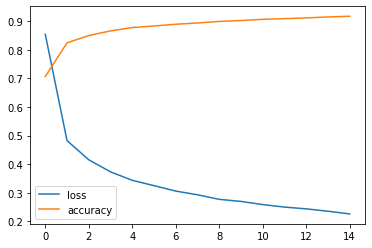

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(history.history.keys());

In [17]:
evaluation = cnn.evaluate(X_test, Y_test)
#temos o loss e accuracy
evaluation

10000/10000 [==============================] - 4s 383us/sample - loss: 0.2856 - accuracy: 0.8978


[0.2855810703992844, 0.8978]

In [18]:
predicted_classes = cnn.predict_classes(X_test)
predicted_classes

array([9, 2, 1, ..., 8, 1, 7])

array([[831,   0,  21,  17,   4,   1, 115,   0,  11,   0],
       [  2, 973,   0,  16,   4,   0,   3,   0,   2,   0],
       [  8,   1, 835,   7,  67,   0,  79,   0,   3,   0],
       [  6,   1,  11, 874,  42,   0,  60,   0,   6,   0],
       [  1,   0,  34,  12, 871,   0,  79,   0,   3,   0],
       [  0,   0,   0,   0,   0, 963,   0,  28,   0,   9],
       [102,   1,  54,  10,  78,   0, 740,   0,  15,   0],
       [  0,   0,   0,   0,   0,   2,   0, 991,   0,   7],
       [  0,   0,   3,   4,   1,   2,   4,   6, 980,   0],
       [  1,   0,   0,   0,   0,   6,   0,  73,   0, 920]])

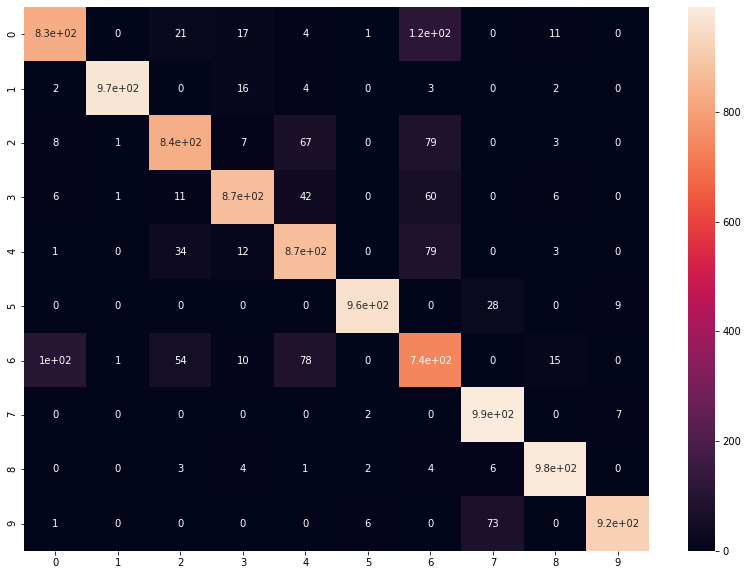

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True)
cm

In [21]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]
target_names

['Class 0',
 'Class 1',
 'Class 2',
 'Class 3',
 'Class 4',
 'Class 5',
 'Class 6',
 'Class 7',
 'Class 8',
 'Class 9']

In [23]:
print(classification_report(Y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.83      0.85      1000
     Class 1       1.00      0.97      0.98      1000
     Class 2       0.87      0.83      0.85      1000
     Class 3       0.93      0.87      0.90      1000
     Class 4       0.82      0.87      0.84      1000
     Class 5       0.99      0.96      0.98      1000
     Class 6       0.69      0.74      0.71      1000
     Class 7       0.90      0.99      0.94      1000
     Class 8       0.96      0.98      0.97      1000
     Class 9       0.98      0.92      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

